In [1]:
import heatrapy as ht
import pandas as pd
import os

if os.path.exists("heat_transfer.txt"):
    os.remove("heat_transfer.txt")
    
example = ht.single_object(amb_temperature=293, materials=('Cu',), borders=(1,21),materials_order=(0,),
                            dx=0.001, dt=0.001, file_name='heat_transfer.txt',boundaries=(0,0), Q=[], Q0=[],initial_state=False)

example.set_input_heat_transfer(1,700,900)

example.compute(timeInterval=30, write_interval=10, solver='implicit_k(x)')

In [2]:
example.Cp[1],example.k[1],example.rho[1]

(385.0, 401.0, 8933.0)

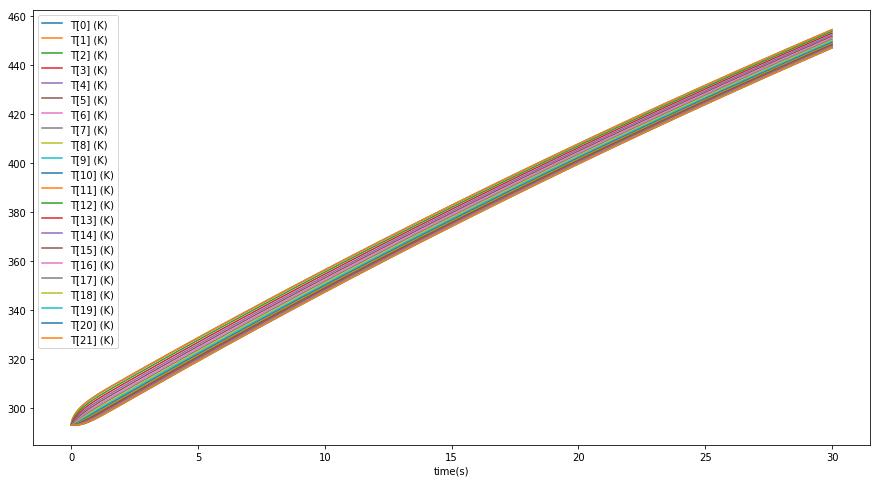

In [4]:
df = pd.read_csv("heat_transfer.txt")
df=df.drop("heat[1](W)", axis=1)
df=df.drop("heat[-2](J)", axis=1)
df = df.set_index("time(s)")
df.plot(figsize=(15,8))

## 検証

In [5]:
ryusoku = example.Heat_transfer_coefficient*(example.Heat_transfer_temparature-293)*10**-6
ryusoku,"[W]"

(0.4249, '[W]')

In [6]:
a = example.Cp[1]*example.rho[1]*0.001*0.001*0.02
a,"[J/K]"

(0.0687841, '[J/K]')

In [7]:
jyosho_ritu = ryusoku/a
jyosho_ritu,"[K/s]"

(6.177299695714562, '[K/s]')